Study the distribution of the different particles features: pions, electrons, ecc..

In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TF1.h"
#include "TMath.h"
#include "THStack.h"
#include "TLegend.h"
#include "Math/Vector4D.h"

//cpp
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

In [2]:
ROOT::RDataFrame df("Events","/home/pietro/Documents/W3Pi/l1Nano_WTo3Pion_PU200_iso.root");
df.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain Events in file /home/pietro/Documents/W3Pi/l1Nano_WTo3Pion_PU200_iso.root

Property                Value
--------                -----
Columns in total           41
Columns from defines        0
Event loops run             0
Processing slots            1

Column                  Type                            Origin
------                  ----                            ------
GenPi_charge            ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_eta               ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_mass              ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_pdgId             ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_phi               ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_prompt            ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_pt                ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_vz                ROOT::VecOps::RVec<Float_t>     Dataset
GenW_charge             ROOT::VecOps::RVec<Int_t>       

In [3]:
auto pt  = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_pt").GetValue();
auto eta = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_eta").GetValue();
auto phi = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_phi").GetValue();
auto id  = df.Take<ROOT::VecOps::RVec<Int_t>>("L1Puppi_pdgId").GetValue();

int ev = 0;
std::cout << pt[ev]<< std::endl;
std::cout << id[ev]<< std::endl;

{ 22.75, 1.5, 32.25, 32.25, 17.5, 2.25, 2.25, 2, 2 }
{ -211, 130, -211, -211, 211, 211, -211, 211, 211 }


In [4]:
std::vector<float> pt_pion;
std::vector<float> pt_electron;
std::vector<float> pt_photon;
std::vector<float> pt_muon;
std::vector<float> pt_h0;

for(int ev=0; ev<pt.size(); ev++){
    for(int i=0; i<pt[ev].size(); i++){
        if(abs(id[ev][i]) == 211) pt_pion.push_back(pt[ev][i]);
        if(abs(id[ev][i]) == 11) pt_electron.push_back(pt[ev][i]);
        if(abs(id[ev][i]) == 22) pt_photon.push_back(pt[ev][i]);
        if(abs(id[ev][i]) == 13) pt_muon.push_back(pt[ev][i]);
        if(abs(id[ev][i]) == 130) pt_h0.push_back(pt[ev][i]);
    }
}


In [5]:
std::cout << pt_pion.size() << std::endl;
std::cout << pt_electron.size() << std::endl;
std::cout << pt_photon.size() << std::endl;
std::cout << pt_muon.size() << std::endl;
std::cout << pt_h0.size() << std::endl;

1235376
19037
84998
11753
101091


## General histogram

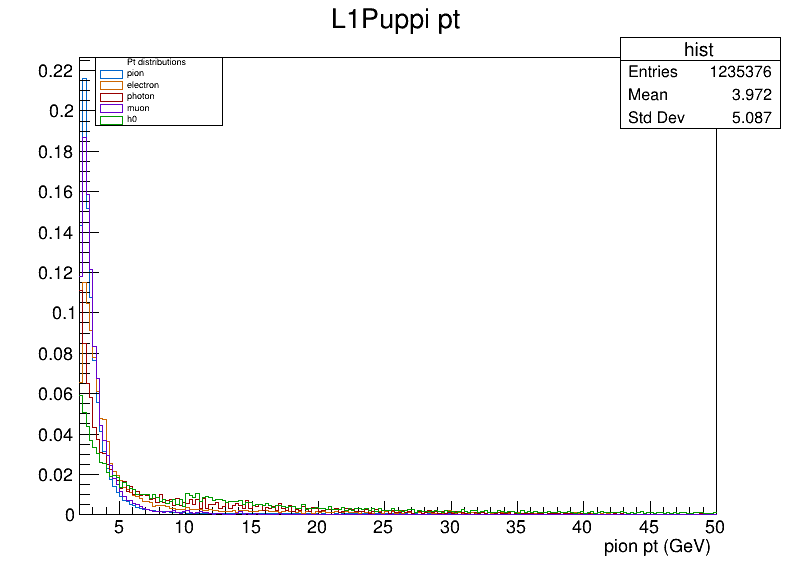

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [51]:
TH1F* hist_pion = new TH1F("hist", "L1Puppi pt; pion pt (GeV)", 192, 2, 50); //GeV
TH1F* hist_electron = new TH1F("hist", "L1Puppi pt; electron pt (GeV)", 192, 2, 50); //GeV
TH1F* hist_photon   = new TH1F("hist", "L1Puppi pt; photon pt (GeV)", 192, 2, 50); //GeV
TH1F* hist_muon = new TH1F("hist", "L1Puppi pt; muon pt (GeV)", 192, 2, 50); //GeV
TH1F* hist_h0   = new TH1F("hist", "L1Puppi pt; h0 pt (GeV)", 192, 2, 50); //GeV


for (const auto &p : pt_pion){
    hist_pion->Fill(p);
}
hist_pion -> SetLineColor(kAzure+2);
hist_pion -> SetLineWidth(1);

for (const auto &e : pt_electron){
    hist_electron->Fill(e);
}
hist_electron -> SetLineColor(kOrange+2);
hist_electron -> SetLineWidth(1);

for (const auto &ph : pt_photon){
    hist_photon->Fill(ph);
}
hist_photon -> SetLineColor(kRed+2);
hist_photon -> SetLineWidth(1);

for (const auto &m : pt_muon){
    hist_muon->Fill(m);
}
hist_muon -> SetLineColor(kViolet+2);
hist_muon -> SetLineWidth(1);

for (const auto &h : pt_h0){
    hist_h0->Fill(h);
}
hist_h0 -> SetLineColor(kGreen+2);
hist_h0 -> SetLineWidth(1);

auto legend = new TLegend(0.12,0.78,0.28,0.9); // (x1, y1, x2, y2)
legend->SetHeader("Pt distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_pion, "pion", "f");
legend->AddEntry(hist_electron, "electron", "f");
legend->AddEntry(hist_photon, "photon", "f");
legend->AddEntry(hist_muon, "muon", "f");
legend->AddEntry(hist_h0, "h0", "f");

auto c1 = new TCanvas("c1", "c1", 800,600);
hist_pion->DrawNormalized();
hist_electron->DrawNormalized("same");
hist_photon->DrawNormalized("same");
hist_muon->DrawNormalized("same");
hist_h0->DrawNormalized("same");
// c1->SetLogy();
legend->Draw();
c1->Draw();


## eta and phi distributions
study the eta distribution for pions having pt>20 e.g.

In [48]:
std::vector<float> pion_eta_pt_lowcut;
std::vector<float> pion_eta_pt_highcut;
std::vector<float> pion_phi_pt_lowcut;
std::vector<float> pion_phi_pt_highcut;

for(int ev=0; ev<pt.size(); ev++){
    for(int i=0; i<pt[ev].size(); i++){
        if( abs(id[ev][i]) == 211 && pt[ev][i] <= 10 ) pion_eta_pt_lowcut.push_back(eta[ev][i]);
        if( abs(id[ev][i]) == 211 && pt[ev][i] >  10)  pion_eta_pt_highcut.push_back(eta[ev][i]);
        if( abs(id[ev][i]) == 211 && pt[ev][i] <= 10 ) pion_phi_pt_lowcut.push_back(phi[ev][i]);
        if( abs(id[ev][i]) == 211 && pt[ev][i] >  10)  pion_phi_pt_highcut.push_back(phi[ev][i]);
    }
}

### eta

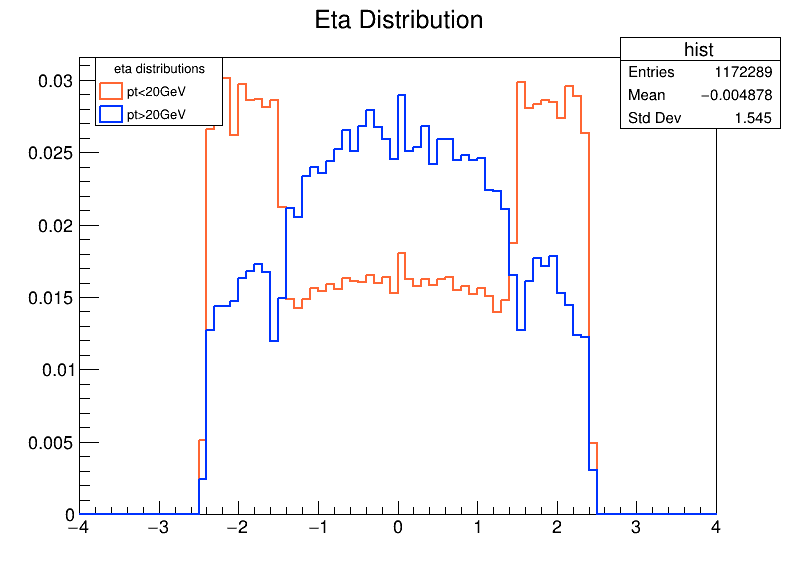

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [49]:
auto c2 = new TCanvas("c2", "c2", 800,600);

TH1F* hist_eta_low = new TH1F("hist", "Eta Distribution; ", 80, -4, 4); //GeV
for (const auto &n : pion_eta_pt_lowcut){
    hist_eta_low->Fill(n);
}

TH1F* hist_eta_high = new TH1F("hist", "Eta Distribution; ", 80, -4, 4); //GeV
for (const auto &n : pion_eta_pt_highcut){
    hist_eta_high->Fill(n);
}

hist_eta_low  -> SetLineColor(kOrange+8);
hist_eta_low  -> SetLineWidth(2);
hist_eta_high -> SetLineColor(kAzure);
hist_eta_high -> SetLineWidth(2);

auto legend = new TLegend(0.12,0.78,0.28,0.9); // (x1, y1, x2, y2)
legend->SetHeader("eta distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_eta_low,  "pt<20GeV", "f");
legend->AddEntry(hist_eta_high, "pt>20GeV", "f");

hist_eta_low  -> DrawNormalized();
hist_eta_high -> DrawNormalized("same");
legend->Draw();
c2-> Draw();

### phi

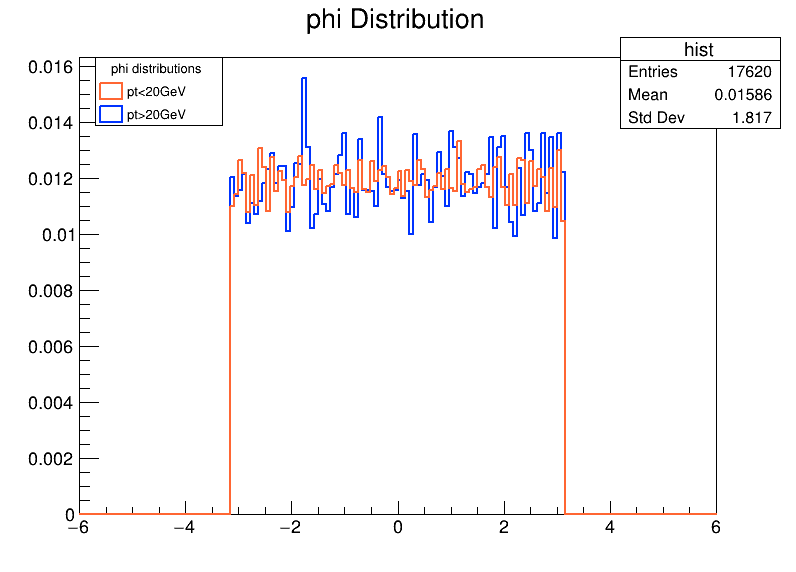

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [42]:
auto c2 = new TCanvas("c2", "c2", 800,600);

TH1F* hist_phi_low = new TH1F("hist", "phi Distribution; ", 160, -6, 6); //GeV
for (const auto &n : pion_phi_pt_lowcut){
    hist_phi_low->Fill(n);
}

TH1F* hist_phi_high = new TH1F("hist", "phi Distribution; ", 160, -6, 6); //GeV
for (const auto &n : pion_phi_pt_highcut){
    hist_phi_high->Fill(n);
}

hist_phi_low  -> SetLineColor(kOrange+8);
hist_phi_low  -> SetLineWidth(2);
hist_phi_high -> SetLineColor(kAzure);
hist_phi_high -> SetLineWidth(2);

auto legend = new TLegend(0.12,0.78,0.28,0.9); // (x1, y1, x2, y2)
legend->SetHeader("phi distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_phi_low,  "pt<20GeV", "f");
legend->AddEntry(hist_phi_high, "pt>20GeV", "f");

hist_phi_high  -> DrawNormalized();
hist_phi_low -> DrawNormalized("same");
legend->Draw();
c2-> Draw();

## LUT for the different particles